# <center>DSA8023 Analytathon 1: <br/> Identification of EV users using Mixed Classification models  </center>
### <center> Varun Suresh Kumar (40364111) <br/><br/> 01-06-2023</center>

## <a id='0' href="#0">Table of Contents:</a>

<a href="#intro">1. Introduction</a><br/>
<a href="#state">2. Statement of the problem</a><br/>
<a href="#obj">3. Research Objective</a><br/>
<a href="#overview">4. Data Overview</a><br/> 
    &emsp;&emsp;<a href="#4_1">4.1 Description of Variables </a><br/>
    &emsp;&emsp;<a href="#4_2">4.2 Exploratory Data Analysis</a><br/>
    &emsp;&emsp;<a href="#4_3">4.3 Measure of Association</a><br/>
    &emsp;&emsp;<a href="#4_4">4.4 Data wrangling</a><br/>
<a href="#method">5. Methodology</a><br/>
<a href="#comparison">6. Comparison of Modal performance</a><br/>
<a href="#results">7. Results and discussion</a><br/>
<a href="#conclusion">8. Conclusion</a><br/>
<a href="#references">9. References</a><br/>


## <a id='intro' href="#intro">1. Introduction</a>

Electric or hybrid vehicles are accounting for 20% of all new passenger vehicle sales by 2022. With over 70,000 EVs on the roads in Ireland (ROI), as of Q1 2023, the proportion of new EV ownership is growing rapidly (Prendergast, 2023). Energia assumes its market share as 10% of all electric vehicle users. Finding the remaining suspected EV users who are not enrolled in Energia's EV Tariff is the challenge. In the existing database, around 2,400 consumers have been identified as the EV Tariff consumers, indicating a considerable untapped market potential. The research on customer’s preference to choose alternative energy suppliers and spreading awareness on the customer benefits of Energia's EV Tariff, is crucial for Energia's market share growth.

Energia can construct Classification models using ML algorithms that assess the likelihood of consumers acquiring an EV based on a variety of data points such as energy use trends, demographic information, and geographic location. These models can help Energia prioritise and target potential EV purchasers within its customer base who have not yet opted into the EV Tariff. By combining these ML predictions with additional sources of data, like vehicle registration databases and public charging station consumption data, Energia can improve the accuracy of identifying suspected EV customers.

This report will employ a number of research methodologies and analytical techniques to uncover an untapped market of prospective EV purchasers in Ireland. We will get valuable insights into the qualities, behaviour, and preferences of the target audience by examining customer data, conducting surveys, and researching market trends. These insights will assist Energia in developing data-driven strategies to meet the specific demands of the undiscovered niche, matching its offers to consumer expectations, and positioning itself as a leading provider in the EV energy market. By bridging the gap between recognised EV consumers and the untapped sector, Energia can contribute to the long-term growth of the EV industry, reduce carbon emissions, improve retention and onboarding of customers, provide better charging infrastructure, improve customer support.  and pave the way for a greener, more environmentally conscious future.


## <a id='state' href="#state">2. Statement of the problem:</a>

The challenge to Energia is to attract and convert an untapped segment of Irish Electric Vehicle (EV) owners who have either chosen other suppliers or are ignorant of the benefits offered by Energia. Despite having attracted 10% of the targeted 70,000 EV clients, Energia's database only shows 2,400 EV Tariff users. The main goal is to improve the EV user identification by employing specialised approaches that successfully explain Energia's benefits and resulting in a greater adoption rate among the untapped EV owner market. Energia can strengthen its market position and become the preferred provider.


## <a id='obj' href="#obj">3. Research Objective:</a>

The objective of this study is to find non-Electric Vehicle (EV) consumers who have comparable socio-demographic profiles and monthly payment habits to existing EV users. The goal is to enhance the chance of these non-EV consumers adopting EVs by targeting them with targeted marketing campaigns and personalised solutions. Ultimately, this project will broaden Energia's client base, encourage sustainable mobility alternatives, and help to shape a better future.


## <a id='overview' href="#overview">4. Data overview:</a>

The provided dataset contains **1,86,558 observations** and **25 variables** related to customer information and their bi-monthly billing data over a two years. 

The variables are accountID, StartDate, ContractStartDateEV, contractStartDate, contractEndDate, saStatus, agedBand, signedUpGroup, title, mosaicType, EV, EV_New_or_Old, bill_1_2021, bill_2_2021, bill_3_2021, bill_4_2021, bill_5_2021, bill_6_2021, bill_1_2022, bill_2_2022, bill_3_2022, bill_4_2022, bill_5_2022, bill_6_2022, bill_1_2023. The **EV** variable is the target label.


## <a id='4_1' href="#4_1">4.1 Description of variables:</a>

There are 13 billing variables *bill_1_2021* to *bill_1_2023* that represents the billing information of customers from January 2021 to January 2023. The billing variables are continuous numeric variables whereas the remaining variables are categorical.

- ***accountID***			: unique identifier for each account
- ***startDate***			: Start date of customer
- ***ContractStartDateEV***	: EV contract start date
- ***ContractStartDate***	: Energia contract start date
- ***ContractEndDate***		: Energia contract end date
- ***saStatus***			: Service status of customers
- ***agedBand***			: age band of customers
- ***signedUpGroup***		: customer’s channel of signup
- ***title***				: title of customer
- ***mosaicType***			: socio Economic class of customers
- ***EV*** (target label) 		: Whether customer has EV or not
- ***EV_New_or_Old***		: Is EV vehicle new or old
- ***Bill_1_2021*** to ***Bill_1_2023***	: Bi-billing information of customer



## <a id='4_2' href="#4_2">4.2 Exploratory Data Analysis:</a>

### Missing Values
Based on the Table 1, *ContractStartDate* and *mosaicType* have a significant percentage of missing values in the dataset.
There are no missing values in the following columns *StartDate, saStatus, signedUpGroup, EV, EV_New_or_Old*.

In [1085]:

table_styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("color", 'black')])]

col_desc = ["Unique identifier for each account",
"Start date of customer",
"EV contract start date",
"Energia contract start date",
"Energia contract end date",
"Service status of customers",
"Age band of customers",
"Customer’s channel of signup",
"Title of the customer",
"Socio Economic class of customers",
"Whether customer has EV or not",
"Is EV vehicle new or old"]

temp1 = raw_d[['accountID', 'StartDate', 'ContractStartDateEV', 'contractStartDate',
       'contractEndDate', 'saStatus', 'agedBand', 'signedUpGroup', 'title',
       'mosaicType', 'EV', 'EV_New_or_Old']]

temp = pd.DataFrame({'Variable': temp1.count().index, 'Description': col_desc, 'No of Observations': temp1.count()})

# temp = temp.set_index('Variable')


temp['Missing data (count)'] = len(raw_d)  -  temp['No of Observations'] 

temp['Missing data (%)'] = round((len(raw_d)  -  temp['No of Observations'])*100 / len(raw_d), 2)
temp= temp[temp['Missing data (%)'] != 0]

temp.sort_values(by="Missing data (count)", ascending=False).style.set_caption('Table 1 Significant Missing values in the dataset').set_table_styles(styles).hide(axis="index")


Variable,Description,No of Observations,Missing data (count),Missing data (%)
ContractStartDateEV,EV contract start date,2516,184042,98.650000
mosaicType,Socio Economic class of customers,144036,42522,22.790000
contractEndDate,Energia contract end date,185591,967,0.520000
contractStartDate,Energia contract start date,185981,577,0.310000


On the basis of the study of the billing data, there are a lot of missing numbers, as shown in Figure 1. Notably, the category with the highest percentage of missing values is bill_1_2021. Nevertheless, it is reassuring to see that the number of missing values has been declining over time. This pattern points to an increase in the reliability and completeness of the data. On the other hand, when taking into account EV consumers who signed up in 2022, a special observation becomes apparent. Their recent enrollment makes missing values for the previous year more common. However, as shown in Figure 3, the study based on enrollment shows a downward trend in missing values within the invoices. These results demonstrate the overall improvement in collecting accurate and thorough billing data over time, emphasising the benefit of enrolment.



In dataset, a variety of Mosai factors have varying percentages of users as members (Figure 2) . In terms of user population, factors like Established Wealth, Suburban Success, Family Focus, Local Families, Rurban Lifestyle, Country Choice, and Distant Views account for 7% to 10%. Conversely, less than 4% of users fall into categories such as City Achievers, Urban Starters, Industrious Workers, Budgeting Families, Senior Owner, and Practical Pensioners.
<br/>
<br/>


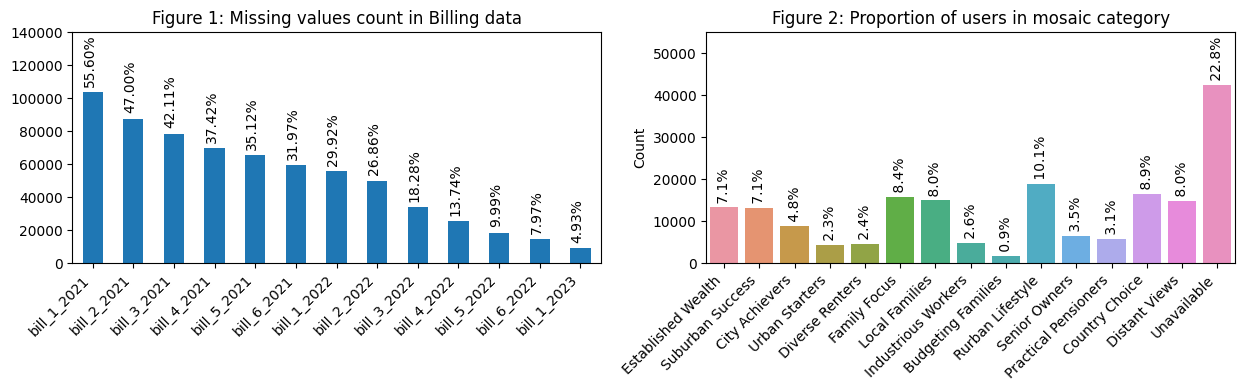

In [395]:
# temp = raw_d.copy()

# def classify_mosaic(x):
#     x['mosaicCat'] = x['mosaicType'][0]
#     return x
    
# temp['mosaicCat'] = 'Unknown'
# temp['mosaicType'] = temp['mosaicType'].fillna('Unknown')
# temp = temp.apply(classify_mosaic, axis=1)


# temp= temp.sort_values(by='mosaicCat').replace({"mosaicCat": {"A": "Established Wealth",
# "B": "Suburban Success",
# "C": "City Achievers",
# "D": "Urban Starters",
# "E": "Diverse Renters",
# "F": "Family Focus",
# "G": "Local Families",
# "H": "Industrious Workers",
# "I": "Budgeting Families",
# "J": "Rurban Lifestyle",
# "K": "Senior Owners",
# "L": "Practical Pensioners",
# "M": "Country Choice",
# "N": "Distant Views",
# "U": "Unavailable"}})


fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(15,3));

x, hue, data, title = 'mosaicCat', 'EV', temp, 'Figure 2: Proportion of users in mosaic category'

ax = sns.countplot(x=x, data=data, ax=axes[1])
ax.set(ylabel='Count', title=title, xlabel='')
ax.set_xticklabels(ax.get_xticklabels() ,rotation=45, ha='right')
ax.set_ylim(0,55000)
for c in ax.containers:
    labels = [f' {h/data[hue].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', rotation=90)


billing_months = ['bill_1_2021', 'bill_2_2021',
       'bill_3_2021', 'bill_4_2021', 'bill_5_2021', 'bill_6_2021',
       'bill_1_2022', 'bill_2_2022', 'bill_3_2022', 'bill_4_2022',
       'bill_5_2022', 'bill_6_2022', 'bill_1_2023']

temp1 = raw_d[billing_months]

missing_values = temp1.isin([0]).sum()
ax1 = missing_values.plot(kind='bar', ax=axes[0], title="Figure 1: Missing values count in Billing data")
ax1.set_ylim(0, 140000)
for container in ax1.containers:
    ax1.set_xticklabels(ax1.get_xticklabels() ,rotation=45, ha='right')

for p in ax1.patches:
    b = p.get_bbox()
    val = "{:.2f}%".format((b.y1 + b.y0)*100/len(raw_d))        
    ax1.annotate(val, (((b.x0 + b.x1 - 0.5)/2), b.y1+5000 ), rotation=90)
    
plt.show()
    

From Figure 4,  53% of the participants are classified as Mr. In the Mr group, non-EV users make up 52% of the population, while EV users make up only 0.9% of the total. Ms, Mrs., and Miss, on the other hand, make up 42% of the dataset as a whole. Only 0.4% of people in this category are EV users, leaving the majority of people to be non-EV users. These results provide insight into the distribution of EV users by title, showing that the Mr group has a higher percentage of non-EV users and that the Ms, Mrs, and Miss categories have a considerably smaller percentage of EV users.

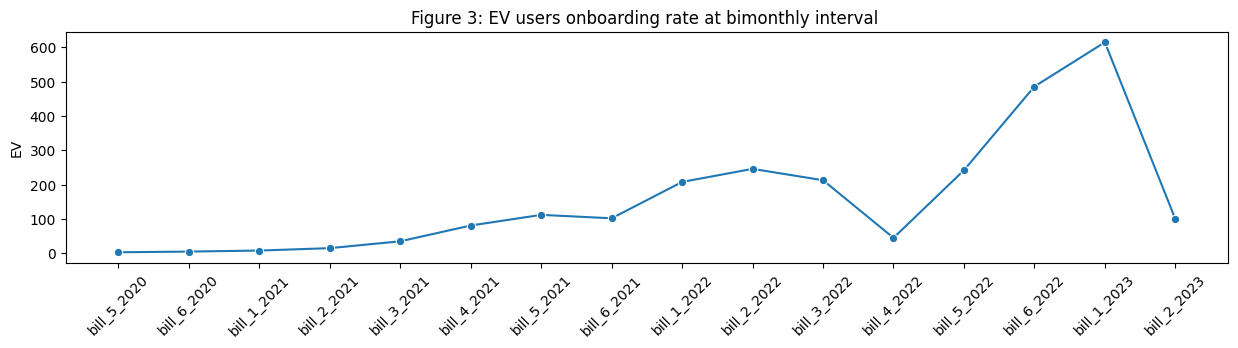

In [1033]:
# ContractStartDateEV

# temp = raw_d.copy()

# temp.ContractStartDateEV.unique()

# temp2 = temp[~temp.isna()['ContractStartDateEV']]

# temp2['evYear'] = pd.DatetimeIndex(temp2['ContractStartDateEV']).year
# temp2['evMonth'] = pd.DatetimeIndex(temp2['ContractStartDateEV']).month


# temp3 = temp2.groupby(['evYear', 'evMonth'])['EV'].count().reset_index()


# # temp3['month_year'] = temp3['evMonth'].astype(str) + "_" + temp3['evYear'].astype(str)

# def makeBiMontlyData(x):
#     if((x['evMonth'] % 2) == 0):
#         x['bill_month'] =  '_'.join(['bill', str(int(x['evMonth'] / 2)), str(x['evYear'])])
#     else:
#         x['bill_month'] =  '_'.join(['bill', str(int((x['evMonth'] + 1) / 2)), str(x['evYear'])])
#     return x

# temp3['bill_month'] = 0
# temp3 = temp3.apply(makeBiMontlyData,axis=1)

# temp4 = temp3.groupby(['bill_month', 'evYear'])['EV'].sum().reset_index()

# temp4 = temp4.sort_values(by=['evYear'])


# fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,3));
plt.figure(figsize=(15,3))
ax = sns.lineplot(data=temp4, x="bill_month", y="EV", marker='o') #, ax=axes[0]);
ax.tick_params(axis='x', labelrotation = 45)
ax.set_xlabel('');
ax.set_title('Figure 3: EV users onboarding rate at bimonthly interval ');


billing_months = ['bill_1_2021', 'bill_2_2021',
       'bill_3_2021', 'bill_4_2021', 'bill_5_2021', 'bill_6_2021',
       'bill_1_2022', 'bill_2_2022', 'bill_3_2022', 'bill_4_2022',
       'bill_5_2022', 'bill_6_2022', 'bill_1_2023']

temp1 = raw_d[billing_months]

# missing_values = temp1.isin([0]).sum()
# ax1 = missing_values.plot(kind='bar', ax=axes[1], title="Figure 1: Missing values count in Billing data")
# ax1.set_ylim(0, 140000)
# for container in ax1.containers:
#     ax1.set_xticklabels(ax1.get_xticklabels() ,rotation=45, ha='right')

# for p in ax1.patches:
#     b = p.get_bbox()
#     val = "{:.2f}%".format((b.y1 + b.y0)*100/len(raw_d))        
#     ax1.annotate(val, (((b.x0 + b.x1 - 0.5)/2), b.y1+5000 ), rotation=90)


The distribution of users among various categories is shown in Figure 5. 16.9% of users fall into the PCW category, with 0.2% of them being EV users and 16.7% of them being non-EV users. 21.3% of users fall into the Telesales group, with 21% of them being EV users. 14.9% of users are in the Web category, of which 14.5% are non-EV users and 0.4% are EV users. A minimum of 0.1% of users are solely EV users, with field sales and OBS being the other 23.6% of users. The remaining 29.4% of customers fall into the "Others" category, with 0.3% of them being designated as EV users.


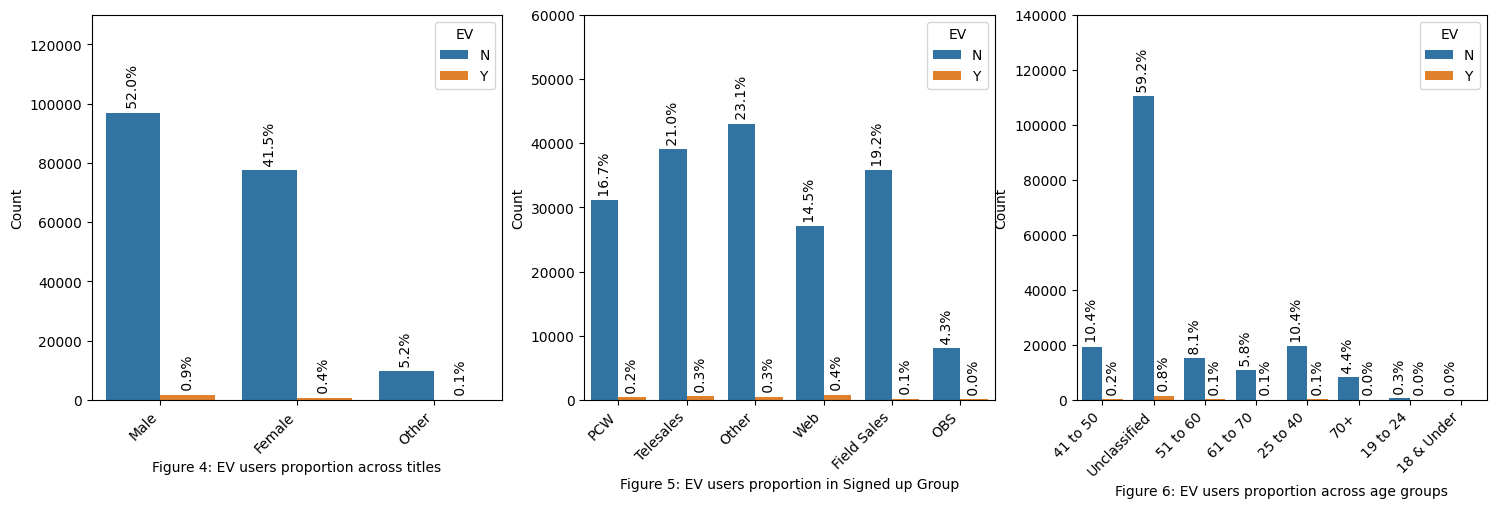

In [1046]:
def getCountGraph(x, hue, data, axes, title ):
    ax = sns.countplot(x=x, hue=hue, data=data, ax=axes)
    ax.set(ylabel='Count', xlabel=title)
    ax.set_xticklabels(ax.get_xticklabels() ,rotation=45, ha='right')

    for c in ax.containers:
        labels = [f' {h/data[hue].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', rotation=90)

temp = raw_d.copy()

temp = temp.replace({'title': {' ':'Other', 'Mr': "Male", 'Ms': "Female", 'Mrs': "Female", 'Miss': "Female", 'Dr': 'Other', 'Mr & Mrs': 'Other', 'Rev': 'Other',
       'Cllr': 'Other'}})

fig, axes = plt.subplots( nrows=1, ncols=3, figsize=(18,5));

getCountGraph('title', 'EV', temp, axes[0], 'Figure 4: EV users proportion across titles')
axes[0].set_ylim(0,130000)
getCountGraph('signedUpGroup', 'EV', temp, axes[1], 'Figure 5: EV users proportion in Signed up Group')
axes[1].set_ylim(0,60000)
getCountGraph('agedBand', 'EV', temp, axes[2], 'Figure 6: EV users proportion across age groups')
axes[2].set_ylim(0,140000)

plt.show()



From Figure 6, 10.5% of the population is between the ages of 25 and 40, with 10.4% of that group using electric vehicles and 0.1% of the population are solely EV users. When it came to customers who were between the ages of 41 and 50, 10.6% of them were found, and only 0.2% of them were EV users. A significant 60% of users were found to be between the ages of 51 and 60, and 0.8% of these users were solely electric vehicle (EV) users. Only 0.1% of the 5.14% of customers who were 60 and older were EV users.

 It is significant that 60% of users belonged to an unspecified age bracket, and that only 0.8% of this group were found to be EV users. These results demonstrate the diverse percentages of EV users across various age groups, highlighting possible chances for targeted advertising and outreach initiatives. No users under the age of 19 were available.

## <a id='4_3' href="#4_3">4.3 Measure of Association:</a>



In the feature selection procedure, a univariate analysis is performed to analyze relationship between the EV status and the variables of age group, signed-up factor, mosaic factor, and title. Assuming the null hypothesis that there is no relation between variables and target variable, we perform Chi-squared test to establish association between them. Based on the p-value calculated, the statistic is highly significant at 95% confidence level which shows significant correlation with target variable as shown in Table 2. So we are considering these variables in the Machine learning models.

In [1086]:
from scipy.stats import chi2_contingency

temp = raw_d.copy()

def performAssociationCheck(cat2, temp ):
    contingency_table = pd.crosstab(temp['EV'], temp[cat2])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    arr = [cat2, 'There is no association between {} and {} variables'.format(cat2, 'EV'), str(p_value), 'Significant' if(p_value < 0.05) else 'Not Significant']
#     print(arr)
    return arr

rows = []
for row in ['agedBand', 'signedUpGroup', 'title','mosaicType']:
    rows.append(performAssociationCheck(row, temp))

null_hyp = []
    
v = pd.DataFrame(rows, columns=['Variable', 'Null Hypothesis', 'p-value', 'Significance']).style.set_caption('Table 2 Testing Significance between variables using Chi Square test.').set_table_styles(styles).hide(axis="index")

v

Variable,Null Hypothesis,p-value,Significance
agedBand,There is no association between agedBand and EV variables,3.13213811595283e-09,Significant
signedUpGroup,There is no association between signedUpGroup and EV variables,1.415185184357035e-149,Significant
title,There is no association between title and EV variables,9.310374982118508e-62,Significant
mosaicType,There is no association between mosaicType and EV variables,1.324534407799008e-66,Significant


In [757]:
# no need
# box plot of mean billing variables
# temp['bill_mean'] = temp[billing_months].mean(axis=1)

# plt.figure(figsize=(4,3))
# ax=sns.boxplot(data=temp, x="bill_mean", y='EV');
# ax.set_title('Figure 3: Mean of billing information for EV and non-EV users');


## <a id='4_4' href="#4_4">4.4 Data Wrangling:</a>



The mosaic factors variables, which originally had 44 sub-classes, were reduced to 15 classes during the data wrangling process to facilitate analysis. Mosaic classes were unknown for about 22.8% of the users, and to fill in the gaps in the data, these cases were labelled as Unavailable. Classes by age group, title, and signedup group were encoded for model training. Each customer's 13 invoices from the dataset,from January 2021 to January 2023 are included. The lack of values for earlier invoices for members who joined the tariff in 2022, however, had a negative influence on the accuracy of our models. At least 44% of the users had one missing bill out of a total of 186,558 participant records. We set a threshold of eliminating observations with greater than eight zero's to ensure data quality. After this cleaning process the dataset has  143,849 observations and they are considered for modelling. 

Based on the fact that, if reading for a billing cycle is missed, the reading will be included in the next billing cycle. So average reading value is applied for previous and current month. Only one intermittent zero value is filled this way Consecutive zero values are ignored. Notably, Bill_1_2023 did not undergo imputation since forward values were not available. 

The findings showed in Figure 7, that for Bill_1_2021, almost 11% of the missing data were imputed, compared to least imputation variables, which ranged from 1.5% to 3%, this shows zero values are significantly reduced in Bill_1_2021.

SMOTE (Synthetic Minority Over-sampling Technique) sampling was used on the dataset to rectify the imbalance between minority and non-minority classes. By interpolating between instances of the minority class that already exist, SMOTE creates synthetic samples for the minority class. SMOTE was only applied to the EV (Electric Vehicle) user class, which represented the minority class in our dataset. With 1,678 EV users and 142,171 NON-EV users in the dataset, we were able to achieve balance by creating new instances for the EV users using SMOTE. This equal representation of the two classes made it possible to create a model that could manage the class disparity and produce reliable predictions for both EV and Non-EV customers.


In [312]:
def average_missing_months(x):
    for index, month in enumerate(billing_months[:-1]):
        next_month = billing_months[index+1]
        if x[month] == 0:
            if(x[next_month] != 0):
                x[month] = x[next_month] / 2
                x[next_month] = x[next_month] / 2
            else:
                break
    return x

temp2 = raw_d.copy()
missing_months_handled = temp2.apply(average_missing_months, axis=1)

temp3 = missing_months_handled[billing_months]

missing_values2 = temp3.isin([0]).sum()


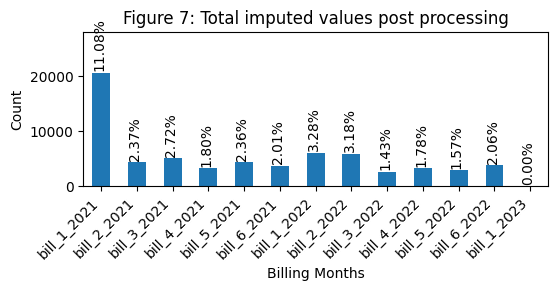

In [1038]:
pre_missing_vals = raw_d.copy()

pre_missing_vals = pre_missing_vals[billing_months]

pre_missing_vals = pre_missing_vals.isin([0]).sum()

total_imputed_vals = pre_missing_vals - missing_values2

ax2 = total_imputed_vals.plot(kind='bar', title="Figure 7: Total imputed values post processing", figsize=(6,2))
ax2.set_ylim(0, 28000)
ax2.set_xlabel('Billing Months')
ax2.set_ylabel('Count')
for container in ax2.containers:
    ax2.set_xticklabels(ax2.get_xticklabels() ,rotation=45, ha='right')
    
for p in ax2.patches:
    b = p.get_bbox()
    val = "{:.2f}%".format((b.y1 + b.y0)*100/len(raw_d))        
    ax2.annotate(val, (((b.x0 + b.x1 - 0.5)/2), b.y1+800 ), rotation=90)
    
    



## <a id='method' href="#method">5. Methodology:</a>

From the given dataset of 186,558 observations, which reduced to 143,849 observations by cleaning and pre-processing techniques. From our initial analysis, we observed our dataset is highly imbalanced. To solve this problem, Synthetic Minority Oversampling Technique (SMOTE) was used to synthetically generate additional instances on the training data for analysis. Logistic regression, Naive Bayes, and K-nearest neighbours (KNN) models were used to classify from EV users from non-EV users those exhibit similar features as EV users. Naive Bayes does classifcation based on computed probabilities on feature occurrences and probabilities. Logistic regression is a binary classification model that computes log arithmatic for features that over comes non linearity. KNN utilised feature similarity score without assuming a specific data distribution to assign new data points to the target class with its closest K neighbours. Based on feature values and related probabilities, it determines if a user is an EV or non-EV, and then chooses the class with the highest likelihood as the anticipated class. A new data point is assigned to the majority class among its k nearest neighbours in the feature space by the non-parametric classification method K-nearest neighbours (KNN). Without making any explicit assumptions about the distribution of the data, KNN predictions are based on feature similarity.


After  model building, we tested their performance on a separate test dataset of 503 EV users and 2013 non-EV users. The primary goal was to identify these user classes using the three models and calculate the number of true positive, true negative, false positive, and false negative classifications produced by each model. This allowed us to examine the model's accuracy, sensitivity and specificity in discriminating between EV and non-EV users. The accuracy of the model predictions is measured by accuracy, while sensitivity (a.k.a., recall or true positive rate) is measured by the proportion of real EV users correctly recognised by the model. The proportion of real non-EV users accurately detected by the model is measured as specificity (a.k.a., true negative rate).

<img src="flowchart.jpeg" width="100%">

By integrating the classifications from all three models, we hoped to gain a more robust and reliable categorization of users who are more likely to follow the same pattern as EV users. This strategy used the aggregate insights and strengths of numerous models, possibly enhancing the accuracy and confidence in detecting people displaying similar behaviour to EV consumers.This combined categorization technique might give useful insights for targeted tactics and interventions, allowing for improved understanding and segmentation of users based on their proclivity to adopt EV user habits.

## <a href="#comparison" id="comparison">6. Comparison of Modal performance</a>

The below table (Table 3), shows the classification model's findings on how well the models performed in classifying EV (Electric Vehicle) users. 

In [1089]:
# LR_users =  LR_predicted_df.reset_index()
# LR_user_ids = LR_users[LR_users.LR_Predicted == 1].index.values


# NB_users =  NB_predicted_df.reset_index()
# NB_user_ids = NB_users[NB_users.NB_Predicted == 1].index.values


# KNN_users =  KNN_predicted_df.reset_index()
# KNN_user_ids = KNN_users[KNN_users.KNN_Predicted == 1].index.values

# RD_users =  raw_d.reset_index()
# RD_user_ids = RD_users[RD_users.EV == 'Y'].index.values

# KNN_LR_ids = [x for x in KNN_user_ids if x in LR_user_ids]

# KNN_NB_ids = [x for x in KNN_user_ids if x in NB_user_ids]

# LR_NB_ids = [x for x in LR_user_ids if x in NB_user_ids]

# final_ids = [x for x in KNN_LR_ids if x in NB_user_ids]

# print(len(final_ids), len(KNN_NB_ids), len(KNN_LR_ids), len(LR_NB_ids))

results = pd.DataFrame([KNN_metrics,  LR_metrics, NB_metrics, ], columns=['Accuracy', 'Specificity', 'Sensitity', 'tmep4', 'tmep3', 'tmep2', 'tmep1']).drop(columns=['tmep4', 'tmep3', 'tmep2', 'tmep1'])

results = results * 100
results['No of EV users Identified'] = [len(KNN_user_ids), len(LR_user_ids) ,len(NB_user_ids)]

results['Models'] = ['K Nearest Neighbour', 'Logistic Regression', "Naive Bayes"]

results = results.set_index(['Models', 'Accuracy', 'Specificity', 'Sensitity', 'No of EV users Identified'])

results = results.style.set_caption('Table 3: Performance metrics and counts of Identified users').set_table_styles(styles)

results

Models,Accuracy,Specificity,Sensitity,No of EV users Identified
K Nearest Neighbour,77.410000,59.450000,63.820000,76684
Logistic Regression,84.880000,84.870000,85.710000,22839
Naive Bayes,91.160000,92.050000,32.560000,15102


KNN attained an accuracy of 77.40%, a sensitivity of 63.81%, and a specificity of 59.44%. Logistic Regression performed better, with an accuracy of 84.87%, a sensitivity of 85.71%, and comparatively highest specificity of 84.86%. Naive Bayes had the maximum accuracy of 91.2%, with a sensitivity of 32.55% and a specificity of 91.04%.These findings show that all three models correctly classified EV and non-EV consumers. Logistic Regression had the best overall accuracy, suggesting a good capacity to accurately identify both sorts of users. It also has a high sensitivity, suggesting a low number of false negatives, and a good specificity, indicating a low rate of false positives.

While KNN's accuracy was significantly lower than that of Logistic Regression, it comparatively performs well in categorising EV users. Among the three models, Naive Bayes scored the best accuracy, reflecting its overall strength. It did, however, have a decreased sensitivity, implying a larger probability of false negatives while keeping a high specificity.Overall, these findings illustrate the models' usefulness in categorising EV and non-EV consumers, with each model displaying its own set of strengths and drawbacks.

<img src="venn_diagram - Copy.png" width="300px">

From Figure 9, it is evidant that Logistic Regression model identified 22,839 users, KNN model identified 76,684 users, and Naive Bayes model classified 15,102 users as more likely to follow the same patterns as EV users. as more likely to be EV users based on characteristics such as Mosai characteristics, Age group, Signed Up Factor, and user titles. By merging two models, it shows 9,734 users were categorised by both Logistic Regression and KNN, 1,823 users were classified by both Logistic Regression and Naive Bayes, and 14,823 users were classified by both KNN and Naive Bayes.

By combining the repeatedly categorised users from the two models, we can improve classification performance since these users are more likely to display patterns similar to EV users. However, when the common users from all three models were combined, around  1,796 persons were discovered. Although these individuals are likely to be EV users, our strategy may deviate on more accurate significant EV users. As we are confident that integrating two models is more efficient, it allows us to infer more EV users without sacrificing critical information.


## <a href="#results" id="results">7. Results and discussion</a>

To prove likeliness of classified EV users being truely EV users, we compare the proportion of distribution of features. Based on Figure-10, which examines patterns of known EV users and classified users from Logistic Regression based on Mosai category, Age Band, and Signed Up channel features, the percentage of proportion of features are substantially identical between the two groups.

The Logistic Regression model efficiently captures the patterns and features of existing EV users, allowing for reliable categorization of new users. This similarity in class proportions makes Logistic Regression an ideal model for EV users classification.


<img src="LR_classified_Features.png" width="100%" alt="LR_classified_Features" />

From Figure-11, the proportions of classes for known cases and classified users are slightly following the same pattern. However there are some discrepancies in proportions when compared to Logistic Regression. 

<img src="NB_Feature_comparison1.png" width="100%" alt="NB_Feature_comparison1" />

While Naive Bayes has a good overall accuracy, its sensitivity is significantly lower than that of Logistic Regression. Furthermore, the capacity to identify true EV users is fairly limited. These findings imply that, when compared to Logistic Regression, Naive Bayes may fail to reliably distinguish actual EV users. Users who are not categorised using Naive Bayes may have a modest possibility of being EV users.

However, because of increased sensitivity in distinguishing actual EV users, Logistic Regression looks to be a superior candidate for a more robust and accurate classification. In summary, though Naive Bayes has acceptable overall accuracy, it may have lesser sensitivity and mediocre performance in distinguishing true EV users. 

## <a id='conclusion' href="#conclusion">8. Conclusion:</a>


Based on our analysis, Logistic Regression had the greatest overall accuracy of 84.87%, surpassing KNN (77.40%) and Naive Bayes (91.20%). Logistic Regression shows a high sensitivity of 85.71%, and far better specificity of 84.86%, indicating a low percentage of false positives. We can conclude Logistic Regression is a good model for effectively categorising EV users and Non-EV users, with a balanced performance in terms of accuracy, sensitivity, and specificity. Furthermore, the findings reveal that the Logistic Regression model is excellent at categorising users based on relevant variables, with promising alignment in terms of class proportions between known EV instances and categorised users. Finally, Logistic Regression exceeds Naive Bayes in effectively categorising EV and Non-EV users based on the features presented, with greater sensitivity and overall performance. In the context of EV adoption, Logistic Regression is advised for more reliable categorization of users, but Naive Bayes may still provide some insights but with lesser sensitivity. 


- From the models likelihood to classify EV users, we are 85.71% confident that Logistic Regression will comparatively perform well. 
- We are 77.7% confident that the users predicted by combining KNN and logistic regression models exhibit patterns similar to EV users. 
- Naive Bayes model performs well in identifying Non-EV users, by eliminating the classified Non-EV users using this model, we are highly suspicious that remaining users will exhibit EV characteristics. 


### Limitations and Suggestions:

- The provided dataset has bi-monthly information, if we could capture the hourly consumption information of the customers, we can classify better using time series and DTW techniques (Chawla, Nitesh & Bowyer, Kevin & Hall, Lawrence & Kegelmeyer, W.. [2002])

- The provided tabular data has customers starting Energia contract and EV tariff at different dates, this makes the dataset contain more zero /NA values, this makes missing values imputation difficult.

### <a id='references' href="#references">9. References:</a>

- Shane Prendergast, Direction of Travel - the growing EV markets in Ireland (26 April 2023) https://www.seai.ie/blog/ev-direction-of-travel/ [accessed 26 May 2023].

- Chawla, Nitesh & Bowyer, Kevin & Hall, Lawrence & Kegelmeyer, W.. (2002). SMOTE: Synthetic Minority Over-sampling Technique. J. Artif. Intell. Res. (JAIR). 16. 321-357. 10.1613/jair.953. 

In [1047]:
# Data Preprocessing

def classify_mosaic(x):
    x['mosaicType'] = x['mosaicType'][0]
    return x
    
    
# implement the average imputation on single missing data
def average_missing_months(x):
    for index, month in enumerate(billing_months[:-1]):
        next_month = billing_months[index+1]
        if x[month] == 0:
            if(x[next_month] != 0):
                x[month] = x[next_month] / 2
                x[next_month] = x[next_month] / 2
            else:
                break
    return x

# # take a copy of raw data
LR_data = raw_d.copy()

LR_data = LR_data.drop(columns=['accountID','StartDate','ContractStartDateEV','contractStartDate','contractEndDate','saStatus'])

LR_data = LR_data.apply(average_missing_months, axis=1)

LR_data['mosaicType'] = LR_data['mosaicType'].fillna('Unknown')
LR_data = LR_data.apply(classify_mosaic, axis=1)


le = LabelEncoder()
 
# keeping nan values in title, agedband as they have relatively less effect on EV classification
LR_data['title'] = le.fit_transform(LR_data['title'])
LR_data['mosaicType'] = le.fit_transform(LR_data['mosaicType'])
LR_data['agedBand'] = le.fit_transform(LR_data['agedBand'])
LR_data['signedUpGroup'] = le.fit_transform(LR_data['signedUpGroup'])

# manually assigning numeric values to EV related categories
rename_props = { 'EV': {'N': 0, 'Y': 1},
                  'EV_New_or_Old': {'Non-EV Customers': 0, 'Switched to EV': 1, 'New EV Customer': 1}} 

LR_data = LR_data.replace(rename_props)



In [1070]:
# # working model - final one

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.model_selection import train_test_split

def visualizeFeatureCount(dataset, feature = 'EV', sizeX = 7, sizeY =7):
    totalData = len(dataset)
    hasFeature = dataset[feature].sum()
    hasNoFeature = totalData - hasFeature

    hasFeature_per = round(hasFeature/totalData * 100, 2)
    hasNoFeature_per = round(hasNoFeature/totalData * 100, 2)

    plt.figure(figsize=(sizeX,sizeY))
    sns.countplot(data = dataset, x=feature)
    plt.annotate('No {}: {}'.format(feature, hasNoFeature), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
    plt.annotate('{}: {}'.format(feature, hasFeature), xy=(0.7, 15000), xytext=(0.9, 3000), size=12)
    plt.annotate(str(hasNoFeature_per)+" %", xy=(-0.3, 15000), xytext=(-0.1, 20000), size=12)
    plt.annotate(str(hasFeature_per)+" %", xy=(0.7, 15000), xytext=(0.9, 20000), size=12)
    plt.show()
    
    
def predict_and_visualize(model, class_col, dataset, class_col_predicted= 'EV_predicted'):
    
    x = dataset.copy()
        
    x= x.drop(columns=[class_col])
    x[class_col_predicted] = model.predict(x)
    visualizeFeatureCount(x, feature=class_col_predicted)
    return x
    
    
@ignore_warnings(category=ConvergenceWarning)
def performLR(LR_data):
    
    LR_df = LR_data.copy()
    
  
    x = LR_df.drop('EV', axis=1)  
    y = LR_df['EV']

    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)
    
    from imblearn.over_sampling import SMOTE , RandomOverSampler
    sampler = RandomOverSampler(random_state=42)

    print('Training set shape: {}'.format(Counter(y_train)))

    X_train, y_train = sampler.fit_resample(X_train, y_train)
    
    print('Training set after sampling: {}'.format(Counter(y_train)))

    LR = LogisticRegression(C=0.00005, random_state=0, solver='lbfgs')

    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)

    cv_scores =cross_val_score(LR, x, y, cv=10)

    modal_report = classification_report(y_test, y_pred, output_dict = True)
    # Print the 5-fold cross-validation scores
#     print()
#     print(classification_report(y_test, y_pred))
#     print()
    print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
          ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

    plt.figure(figsize=(4,3))
    ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
                xticklabels = ['No EV', 'EV'], 
                yticklabels = ['No EV', 'EV'])
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    total1=sum(sum(ConfMatrix))
    plt.title("Confusion Matrix - {}".format('Linear Regression'));

    #####from confusion matrix calculate accuracy
    accuracy = metrics.accuracy_score(y_pred,y_test)
    print('Accuracy:', accuracy)
    sensitivity = ConfMatrix[0,0]/(ConfMatrix[0,0]+ConfMatrix[0,1])
    print('Sensitivity : ', sensitivity )
    specificity = ConfMatrix[1,1]/(ConfMatrix[1,0]+ConfMatrix[1,1])
    print('Specificity : ', specificity)
#     ['accuracy', 'sensitivity', 'specificity', 'recall(0)', 'f1-score(0)', 'recall(1)', 'f1-score(1)' ]
    return LR, np.array([accuracy, sensitivity, specificity, modal_report['0']['recall'], modal_report['0']['f1-score'], modal_report['1']['recall'], modal_report['1']['f1-score'] ]).round(4)


df = LR_data.copy()
df['no_of_zero_bills'] = df[billing_months].isin([0]).sum(axis=1)
df = df[df['no_of_zero_bills'] < 8]
df = df.drop(columns=['no_of_zero_bills'])


model, LR_metrics = performLR(df)
LR_predicted_df = predict_and_visualize(model, 'EV', dataset=df, class_col_predicted = 'LR_Predicted')


In [1042]:
# # ## Analysing with Decision tree algorithm

# from sklearn.utils._testing import ignore_warnings
# from sklearn.exceptions import ConvergenceWarning
# from sklearn import metrics # for the check the error and accuracy of the model

# def getTunedDecisionParameters(LR_data):
#     DT_data = LR_data.copy()
    
#     x = DT_data.drop('EV', axis=1)  
#     y = DT_data['EV']
    
    
#     # Setup the parameters and distributions to sample from: param_dist
#     param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
#                   "max_features": [1,2,3,4,5,6,7,8,9],
#                   "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
#                   "criterion": ["gini", "entropy"]}

#     # Instantiate a Decision Tree classifier: tree
#     tree = DecisionTreeClassifier()

#     # Instantiate the RandomizedSearchCV object: tree_cv
#     tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)


#     X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)

#     # Fit it to the data
#     tree_cv.fit(X_train, y_train)

#     # Print the tuned parameters and score
#     print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

# @ignore_warnings(category=ConvergenceWarning)
# def performDecisionTree(LR_data):
    
#     from imblearn.over_sampling import SMOTE , RandomOverSampler
#     sampler = RandomOverSampler(random_state=42)
    
#     DT_data = LR_data.copy()
    
#     x = DT_data.drop('EV', axis=1)  
#     y = DT_data['EV']
#     X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)

#     print('Training set shape: {}'.format(Counter(y_train)))

#     X_train, y_train = sampler.fit_resample(X_train, y_train)
    
#     print('Training set after sampling: {}'.format(Counter(y_train)))

    
#     Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
#                                          max_features=9 , min_samples_leaf= 2, 
#                                          random_state=42)
#     Tree.fit(X_train, y_train)
#     y_pred = Tree.predict(X_test)

#     cv_scores =cross_val_score(Tree, x, y, cv=10)

#     modal_report = classification_report(y_test, y_pred, output_dict = True)
#     # Print the 5-fold cross-validation scores
#     #     print()
#     #     print(classification_report(y_test, y_pred))
#     #     print()
#     print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
#           ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

#     plt.figure(figsize=(4,3))
#     ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
#     sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
#                 xticklabels = ['No EV', 'EV'], 
#                 yticklabels = ['No EV', 'EV'])
#     plt.ylabel('True label');
#     plt.xlabel('Predicted label');
#     total1=sum(sum(ConfMatrix))
#     plt.title("Confusion Matrix - {}".format('Linear Regression'));

#     accuracy = metrics.accuracy_score(y_pred,y_test)
#     print('Accuracy:', accuracy)
#     sensitivity = ConfMatrix[0,0]/(ConfMatrix[0,0]+ConfMatrix[0,1])
#     print('Sensitivity : ', sensitivity )
#     specificity = ConfMatrix[1,1]/(ConfMatrix[1,0]+ConfMatrix[1,1])
#     print('Specificity : ', specificity)
#     return Tree, np.array([accuracy, sensitivity, specificity, modal_report['0']['recall'], modal_report['0']['f1-score'], modal_report['1']['recall'], modal_report['1']['f1-score'] ]).round(4)


# df = LR_data.copy()
# df['no_of_zero_bills'] = df[billing_months].isin([0]).sum(axis=1)
# df = df[df['no_of_zero_bills'] < 8]
# df = df.drop(columns=['no_of_zero_bills'])


# # getTunedDecisionParameters(df)

# model, _ = performDecisionTree(df)
# DT_predicted_df = predict_and_visualize(model, 'EV', dataset=df, class_col_predicted = 'DT_Predicted')

# # modal_scores['Decision Tree'] = DT_metrics

In [876]:
# # ## Analysing with Decision tree algorithm

# from sklearn.utils._testing import ignore_warnings
# from sklearn.exceptions import ConvergenceWarning
# from sklearn import metrics # for the check the error and accuracy of the model

# def getTunedDecisionParameters(LR_data):
#     RF_data = LR_data.copy()
    
#     # Setup the parameters and distributions to sample from: param_dist
#     param_dist = {'n_estimators': [50,100,150,200,250],
#                "max_features": [1,2,3,4,5,6,7,8,9],
#                'max_depth': [1,2,3,4,5,6,7,8,9],
#                "criterion": ["gini", "entropy"]}

#     rf = RandomForestClassifier()

#     x = RF_data.drop('EV', axis=1)  
#     y = RF_data['EV']

#     X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)

#     X_train, y_train = perform_sampling(X_train, y_train, y_test, sampling='under')

#     rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
#                                cv = 5, random_state=0, n_jobs = -1)

#     rf_cv.fit(x, y)

#     print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

# @ignore_warnings(category=ConvergenceWarning)
# def performDecisionTree(LR_data):
    
#     from imblearn.over_sampling import SMOTE , RandomOverSampler
#     sampler = RandomOverSampler(random_state=42)
    
#     DT_data = LR_data.copy()
    
#     x = DT_data.drop('EV', axis=1)  
#     y = DT_data['EV']
#     X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)

#     print('Training set shape: {}'.format(Counter(y_train)))

#     X_train, y_train = sampler.fit_resample(X_train, y_train)
    
#     print('Training set after sampling: {}'.format(Counter(y_train)))

    
#     Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
#                                          max_features=9 , min_samples_leaf= 2, 
#                                          random_state=42)
#     Tree.fit(X_train, y_train)
#     y_pred = Tree.predict(X_test)

#     cv_scores =cross_val_score(Tree, x, y, cv=10)

#     modal_report = classification_report(y_test, y_pred, output_dict = True)
#     # Print the 5-fold cross-validation scores
#     #     print()
#     #     print(classification_report(y_test, y_pred))
#     #     print()
#     print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
#           ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

#     plt.figure(figsize=(4,3))
#     ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
#     sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
#                 xticklabels = ['No EV', 'EV'], 
#                 yticklabels = ['No EV', 'EV'])
#     plt.ylabel('True label');
#     plt.xlabel('Predicted label');
#     total1=sum(sum(ConfMatrix))
#     plt.title("Confusion Matrix - {}".format('Linear Regression'));

#     accuracy = metrics.accuracy_score(y_pred,y_test)
#     print('Accuracy:', accuracy)
#     sensitivity = ConfMatrix[0,0]/(ConfMatrix[0,0]+ConfMatrix[0,1])
#     print('Sensitivity : ', sensitivity )
#     specificity = ConfMatrix[1,1]/(ConfMatrix[1,0]+ConfMatrix[1,1])
#     print('Specificity : ', specificity)
#     return Tree, np.array([accuracy, sensitivity, specificity, modal_report['0']['recall'], modal_report['0']['f1-score'], modal_report['1']['recall'], modal_report['1']['f1-score'] ]).round(4)


# df = LR_data.copy()
# df['no_of_zero_bills'] = df[billing_months].isin([0]).sum(axis=1)
# df = df[df['no_of_zero_bills'] < 8]
# df = df.drop(columns=['no_of_zero_bills'])


# # getTunedDecisionParameters(df)

# model, _ = performDecisionTree(df)
# DT_predicted_df = predict_and_visualize(model, 'EV', dataset=df, class_col_predicted = 'DT_Predicted')

# # modal_scores['Decision Tree'] = DT_metrics

In [1068]:
# working model - final one

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


def performNaiveBayes(data):
    x = data.drop('EV', axis=1)  
    y = data['EV']

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    # Create a Naive Bayes classifier
    clf = GaussianNB()

    # Train the classifier
    
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    
    cv_scores =cross_val_score(clf, x, y, cv=10)

    modal_report = classification_report(y_test, y_pred, output_dict = True)
    # Print the 5-fold cross-validation scores
    #     print()
    #     print(classification_report(y_test, y_pred))
    #     print()
    print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
          ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

    plt.figure(figsize=(4,3))
    ConfMatrix = confusion_matrix(y_test,clf.predict(X_test))
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
                xticklabels = ['No EV', 'EV'], 
                yticklabels = ['No EV', 'EV'])
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    total1=sum(sum(ConfMatrix))
    plt.title("Confusion Matrix - {}".format('Linear Regression'));

    accuracy = metrics.accuracy_score(y_pred,y_test)
    print('Accuracy:', accuracy)
    sensitivity = ConfMatrix[0,0]/(ConfMatrix[0,0]+ConfMatrix[0,1])
    print('Sensitivity : ', sensitivity )
    specificity = ConfMatrix[1,1]/(ConfMatrix[1,0]+ConfMatrix[1,1])
    print('Specificity : ', specificity)
    return clf, np.array([accuracy, sensitivity, specificity, modal_report['0']['recall'], modal_report['0']['f1-score'], modal_report['1']['recall'], modal_report['1']['f1-score'] ]).round(4)


df = LR_data.copy().reset_index()
# df = df.drop(columns=billing_months)
df = df.drop(columns=['no_of_zero_bills'])

model, NB_metrics = performNaiveBayes(df)


NB_predicted_df = predict_and_visualize(model, 'EV', dataset=df, class_col_predicted = 'NB_Predicted')



In [1067]:
# working model - final one

## KNN classification

# df = df.drop(columns=billing_months)
# df = df.drop(columns=['no_of_zero_bills'])


# KNN_data = cleaned_data.copy()

# KNN_data = scale_data_standard_scaler(KNN_data, KNN_data.columns)

# for month in KNN_data.columns:
#     KNN_data[month] = boxcox(KNN_data[month])[0]

def performKNN(KNN_data):

    x = KNN_data.drop('EV', axis=1)  
    y = KNN_data['EV']

    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)

    from imblearn.under_sampling import NearMiss
    sampler = NearMiss()

    print('Training set shape: {}'.format(Counter(y_train)))
    X_train, y_train = sampler.fit_resample(X_train, y_train)
    print('Training set after sampling: {}'.format(Counter(y_train)))

    from sklearn.neighbors import KNeighborsClassifier
#     training_accuracy = []
#     test_accuracy = []
#     # try n_neighbors from 1 to 10
#     neighbors_settings = range(1, 11)
#     for n_neighbors in neighbors_settings:
#         # build the model
#         knn = KNeighborsClassifier(n_neighbors=n_neighbors)
#         knn.fit(X_train, y_train)
#         # record training set accuracy
#         training_accuracy.append(knn.score(X_train, y_train))
#         # record test set accuracy
#         test_accuracy.append(knn.score(X_test, y_test))
#     plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
#     plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
#     plt.ylabel("Accuracy")
#     plt.xlabel("n_neighbors")
#     plt.legend()
#     plt.savefig('knn_compare_model')

    knn = KNeighborsClassifier(n_neighbors=110)
    knn.fit(X_train, y_train)
    
    cv_scores =cross_val_score(knn, x, y, cv=10)

    modal_report = classification_report(y_test, y_pred, output_dict = True)
    # Print the 5-fold cross-validation scores
    #     print()
    #     print(classification_report(y_test, y_pred))
    #     print()
    print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
          ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

    plt.figure(figsize=(4,3))
    ConfMatrix = confusion_matrix(y_test,knn.predict(X_test))
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
                xticklabels = ['No EV', 'EV'], 
                yticklabels = ['No EV', 'EV'])
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    total1=sum(sum(ConfMatrix))
    plt.title("Confusion Matrix - {}".format('Linear Regression'));

    accuracy = metrics.accuracy_score(y_pred,y_test)
    print('Accuracy:', accuracy)
    sensitivity = ConfMatrix[0,0]/(ConfMatrix[0,0]+ConfMatrix[0,1])
    print('Sensitivity : ', sensitivity )
    specificity = ConfMatrix[1,1]/(ConfMatrix[1,0]+ConfMatrix[1,1])
    print('Specificity : ', specificity)
    return knn, np.array([accuracy, sensitivity, specificity, modal_report['0']['recall'], modal_report['0']['f1-score'], modal_report['1']['recall'], modal_report['1']['f1-score'] ]).round(4)


KNN_data = LR_data.copy().reset_index()
model, KNN_metrics = performKNN(KNN_data)


KNN_predicted_df = predict_and_visualize(model, 'EV', dataset=KNN_data, class_col_predicted = 'KNN_Predicted')


In [792]:
# below blocks contains codes used to generate graphs for presentation

In [791]:
# # no of records reduced by considering less than 8 zeros in an observation 

# df = LR_data.copy()
# df['no_of_zero_bills'] = df[billing_months].isin([0]).sum(axis=1)

# df = df[df['no_of_zero_bills'] < 8]

# # len(LR_data) - len(df) 42709

# print((LR_data[billing_months].isin([0]).sum().sum() - df[billing_months].isin([0]).sum().sum() )/ LR_data[billing_months].isin([0]).sum().sum(),)
# print()

# print((len(LR_data) - len(df))/len(LR_data))
# len(df)


# df.EV.value_counts()

In [790]:
# # analysign mosaic type

# # temp = raw_d.copy()

# # def classify_mosaic(x):
# #     x['mosaicCat'] = x['mosaicType'][0]
# #     return x
    
# # temp['mosaicCat'] = 'Unknown'
# # temp['mosaicType'] = temp['mosaicType'].fillna('Unknown')
# # temp = temp.apply(classify_mosaic, axis=1)

# temp[temp.EV == 'Y'].mosaicCat.value_counts()*100 / len(temp[temp.EV == 'Y'])

# temp['no_of_zero_bills'] = temp[billing_months].isin([0]).sum(axis=1)

# pre_missing_vals = temp[billing_months].isin([0]).sum()


# # temp['no_of_zero_bills'].value_counts().plot(kind='bar', title="Zero counts in billing data of each observations")

# ax2 = pre_missing_vals.plot(kind='bar', title="")
# ax2.set_ylim(0, 124500)
# for container in ax2.containers:
#     ax2.set_xticklabels(ax2.get_xticklabels() ,rotation=45, ha='right')
    
# for p in ax2.patches:
#     b = p.get_bbox()
#     val = "{:.2f}%".format((b.y1 + b.y0)*100/len(raw_d))        
#     ax2.annotate(val, (((b.x0 + b.x1 - 0.5)/2), b.y1+5000 ), rotation=90)
    

In [968]:
# ww = raw_d.copy()

# ww = ww[ww.EV=='Y']

# def classify_mosaic(x):
#     x['mosaicCat'] = x['mosaicType'][0]
#     return x
    
# ww['mosaicCat'] = 'Unknown'
# ww['mosaicType'] = ww['mosaicType'].fillna('Unknown')
# ww = ww.apply(classify_mosaic, axis=1)

# tt = ww.groupby(['mosaicCat'])['accountID'].count().rename('count').reset_index().replace({"mosaicCat": {"A": "Established Wealth",
# "B": "Suburban Success",
# "C": "City Achievers",
# "D": "",
# "E": "Diverse Renters",
# "F": "Family Focus",
# "G": "Local Families",
# "H": "",
# "I": "Budgeting Families",
# "J": "Rurban Lifestyle",
# "K": "Senior Owners",
# "L": "Practical Pensioners",
# "M": "Country Choice",
# "N": "Distant Views",
# "U": "Unavailable"}})
# tt = tt.set_index('mosaicCat')
# tt.plot.pie(y='count', figsize=(10, 5), autopct='%1.1f%%', explode=(0,0,0,0,0,0,0,0,0,0.05,0,0,0,0,0) , legend=False, title="Mosaic Categories")


# ww = LR_predicted_df

# tt = ww.groupby(['mosaicType'])['mosaicType'].count().rename('count').reset_index()
# tt = tt.set_index('mosaicType')
# tt
# tt.plot.pie(y='count', figsize=(10, 5), autopct='%1.1f%%' , legend=False, title="Classified Mosaic category Proportions")




In [1015]:

# colorMap = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

# ww = raw_d.copy()

# ww = ww[ww.EV=='Y']

# tt = ww.groupby(['agedBand'])['accountID'].count().rename('count').reset_index()
# tt = tt.set_index('agedBand')
# tt
# tt.plot.pie(y='count', figsize=(10, 5),  autopct='%1.1f%%', explode=(0,0,0.05,0,0,0,0) , legend=False, title="Age Band Proportions")


# ww = LR_predicted_df

# tt = ww.groupby(['agedBand'])['agedBand'].count().rename('count').reset_index()
# tt = tt.set_index('agedBand')
# tt
# tt.plot.pie(y='count', figsize=(10, 5), autopct='%1.1f%%' , legend=False, title="Classified Age Band Proportions")




In [1045]:
# ww = raw_d.copy()

# ww = ww[ww.EV=='Y']

# tt = ww.groupby(['signedUpGroup'])['accountID'].count().rename('count').reset_index()
# tt = tt.set_index('signedUpGroup')
# tt.plot.pie(y='count', figsize=(10, 5), autopct='%1.1f%%', explode=(0,0,0,0,0,0.05) ,legend=False, title="Signed Up Group Proportions")


# ww = NB_predicted_df

# tt = ww.groupby(['signedUpGroup'])['signedUpGroup'].count().rename('count').reset_index()
# tt = tt.set_index('signedUpGroup')
# tt
# tt.plot.pie(y='count', figsize=(10, 5), autopct='%1.1f%%' , legend=False, title="Classified Signed up Proportions")


In [870]:
# ww = raw_d.copy()

# ww = ww[ww.EV=='Y'].replace({'title': {' ':'Other', 'Mr': "Male", 'Ms': "Female", 'Mrs': "Female", 'Miss': "Female", 'Dr': 'Other', 'Mr & Mrs': 'Other', 'Rev': 'Other',
#        'Cllr': 'Other'}})

# tt = ww.groupby(['title'])['accountID'].count().rename('count').reset_index()
# tt = tt.set_index('title')
# tt.plot.pie(y='count', figsize=(10, 5), autopct='%1.1f%%', legend=False, explode=(0, 0, 0), title="Customer's Title Proportions")

# # raw_d.title.unique()


In [873]:
# data = raw_d.groupby("EV")[billing_months].mean()

# fig, ax = plt.subplots(figsize=(13, 4))

# x_labels = [col.replace("_", " ") for col in billing_months]
# x_positions = range(len(billing_months))
# for type in data.index:
#     prev_bill_cycle = data.loc[type].shift(1)
#     pct_change = (data.loc[type] - prev_bill_cycle) / prev_bill_cycle * 100

#     ax.plot(x_positions, data.loc[type], label=type, marker='x')

# ax.set_title("Mean billing value of EV users and Non-EV users for every billing months")
# x_labels = billing_months
# ax.set_ylabel("Billing Mean Value")
# ax.set_xlabel("Billing months")
# ax.set_xticks(x_positions)
# ax.set_xticklabels(x_labels, rotation=45)
# ax.legend()

# plt.show()

In [874]:

from IPython.display import HTML

HTML('''<script>
show=true; 
$('a').css({"text-decoration": "none"})


function code_toggle() {
 if (show){
 $('div.input').hide();
  $('.output_stderr').hide();
  $('bdi').hide();
  $('.rendered_html p').css({
    "text-align": "justify"   
});
  
 } else {
 $('div.input').show();
 $('.output_stderr').show();
 $('bdi').show();

 }
 show = !show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code blocks."></form>''')